### random forest

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that
operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random
forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is 
returned.[1][2] Random decision forests correct for decision trees' habit of overfitting to their training set.[3]: 587–588 
Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees.[citation needed]
However, data characteristics can affect their performance.

It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

#### ensamble  learning

Ensemble simplymeans combining multiple models.

Ensemble learning is a general meta approach to machine learning that seeks better predictive performance by combining the 
predictions from multiple models.

The three main classes of ensemble learning methods are bagging, stacking, and boosting

#### Ensemble uses two types of methods:

1. Bagging– It creates a different training subset from sample training data with replacement & the final output is based on 
   majority voting. For example,  Random Forest.Bagging, also known as Bootstrap Aggregation.



2. Boosting– It combines weak learners into strong learners by creating sequential models such that the final model has the
   highest accuracy. For example,  ADA BOOST, XG BOOST.

### difference between 
#### Decision trees  Random Forest
1.  Decision trees normally suffer from the problem of overfitting if it’s allowed to grow without any control.

#### random forest
1.  Random forests are created from subsets of data, and the final output is based on average or majority ranking; hence the
    problem of overfitting is taken care of.

#### Why do we use random forest algorithms?

1.  Random Forest is a popular machine learning algorithm used for classification and regression tasks due to its high
    accuracy, robustness, feature importance, versatility, and scalability. Random Forest reduces overfitting by averaging
    multiple decision trees and is less sensitive to noise and outliers in the data. It provides a measure of feature               importance,which can be useful for feature selection and data interpretation.

#### How do you explain a random forest?

A.  Random Forest is a supervised learning algorithm that works on the concept of bagging. In bagging, a group of models is 
   trained on different subsets of the dataset, and the final output is generated by collating the outputs of all the different 
   models. In the case of random forest, the base model is a decision tree.

### Ensamble of Decision tree

#### Random forest

<IPython.core.display.Javascript object>


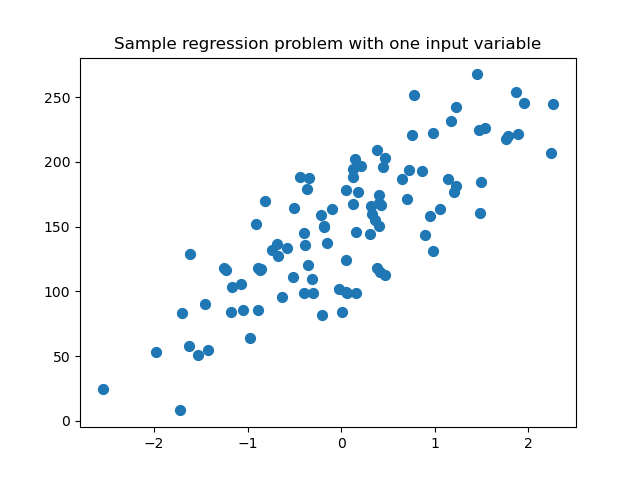

<IPython.core.display.Javascript object>


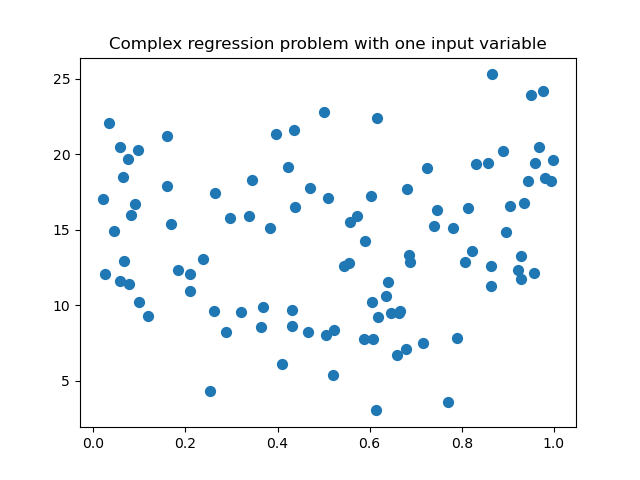

<IPython.core.display.Javascript object>


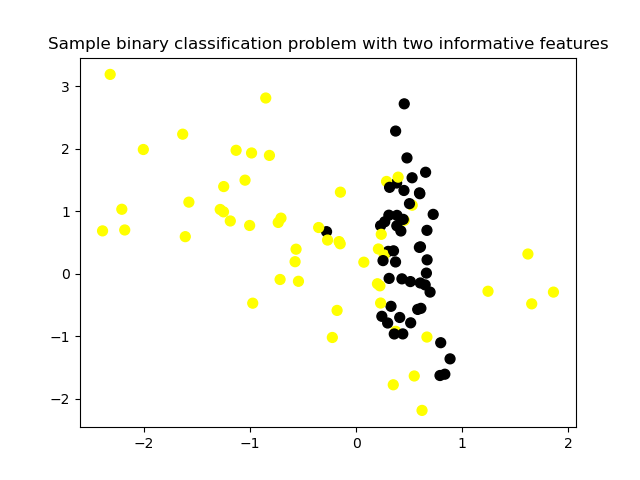

<IPython.core.display.Javascript object>


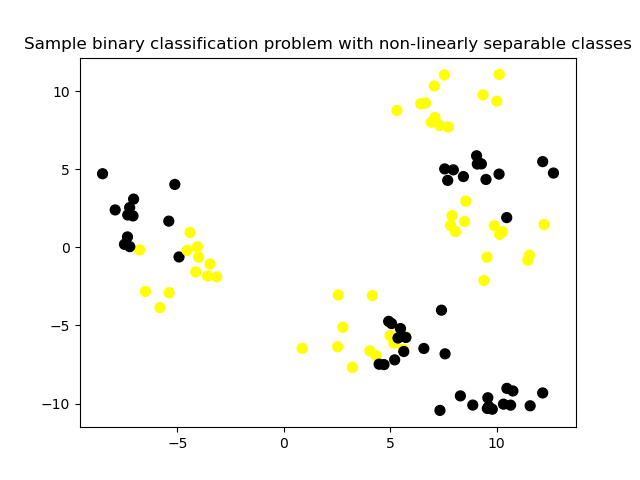

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('assets/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

<IPython.core.display.Javascript object>


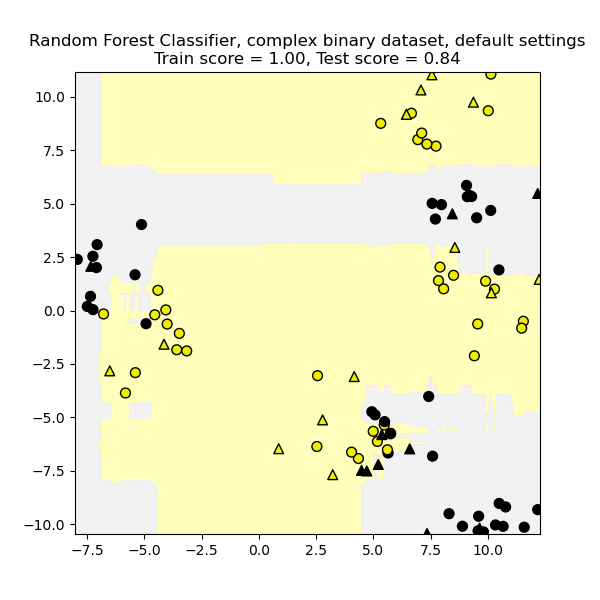

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2,y_D2,random_state=0)

fig, subaxes = plt.subplots(1,1, figsize=(6,6))
clf = RandomForestClassifier().fit(X_train,y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf,X_train,y_train,X_test,y_test,title,subaxes)
plt.show()

### Random forest : Fruit datasets

<IPython.core.display.Javascript object>


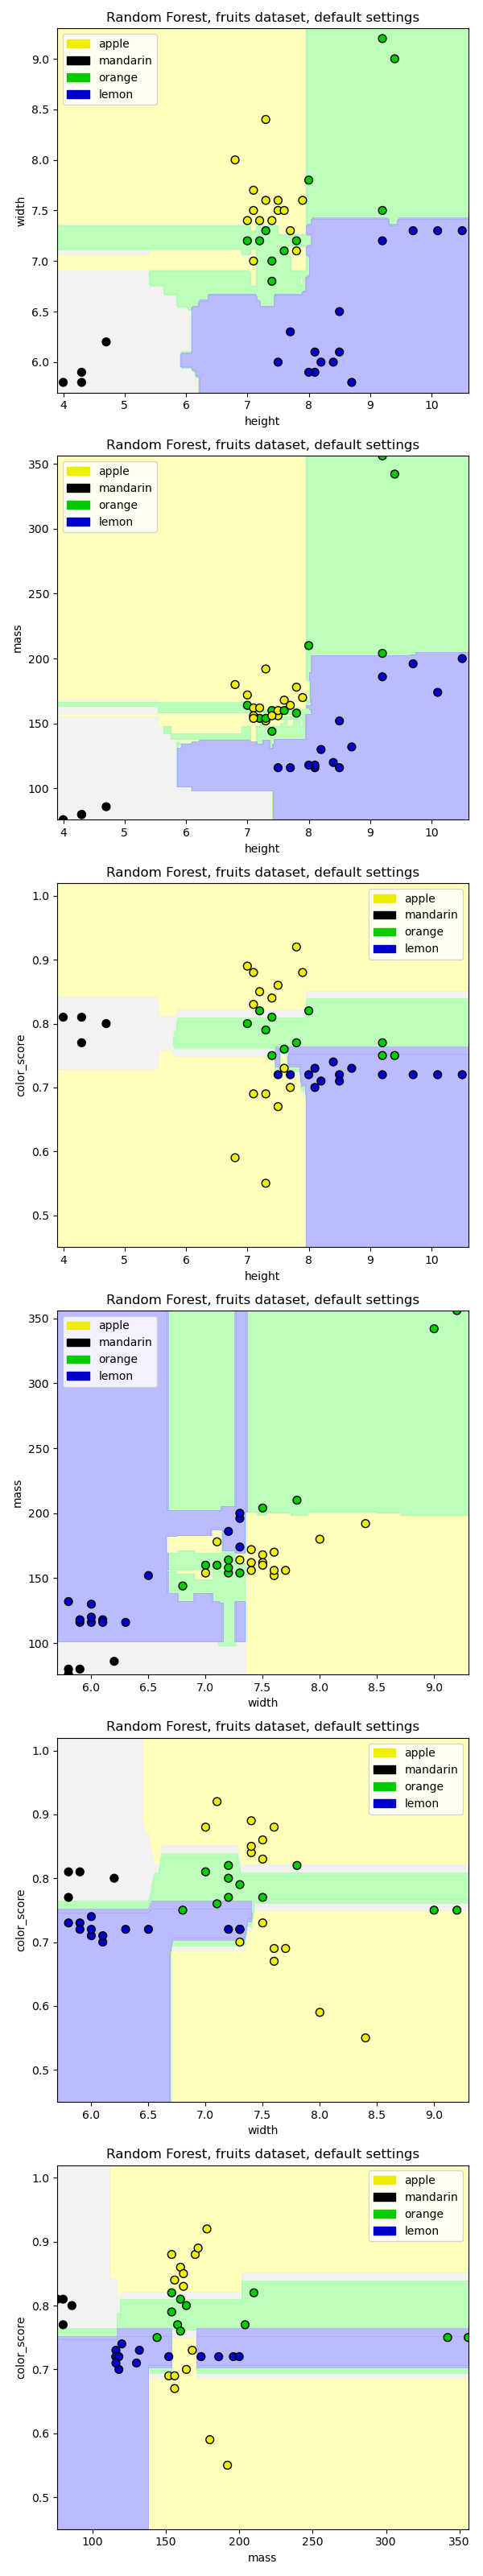

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.values,
                                                   y_fruits.values,
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### random forest on a real world dataset

In [13]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.97
